<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/machinelearning/blob/main/chapter2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter2-2: Data Preprocessing and Standard Score

Garbage in garbage out. Properly processed data enhances the performance, accuracy, and generalization ability of models. It is important for scaling and normalization, for example. Features in a dataset may have different scales, and some ML algorithms such as distance-based algorithms are sensitive to the scale of the input features.
> Tree-based algorithms such as decision trees, random forest, and gradient boosted trees are different from them.

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6])) # 3*2 size array

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(type(fish_data))
print(fish_data[:5])

<class 'numpy.ndarray'>
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

Saving IMG_0034.jpg to IMG_0034 (4).jpg


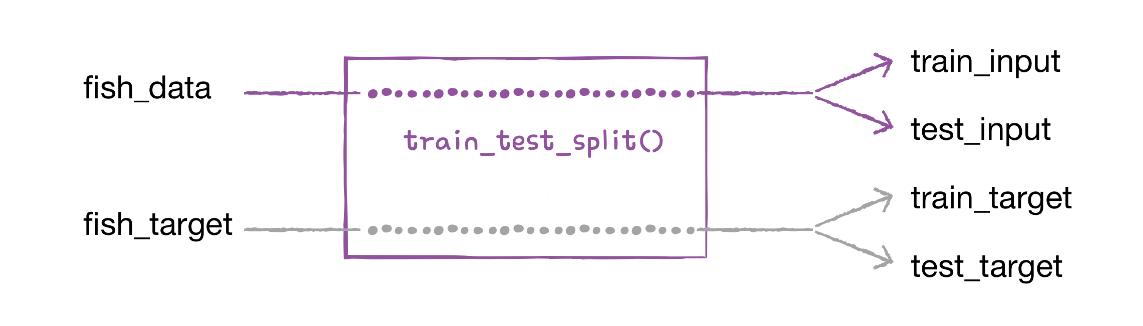

In [29]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('IMG_0034.jpg')

As there are two arrays of fish_data and fish_target, the total number of array is 4. The first two are train_input and test_input, and the other two are train_target, and test_target.

When you perform random splitting of a dataset, especially when dealing with a relatively small dataset and imbalanced class distributions, there is a risk that the resulting train and test sets may not be representative of the overall class distribution. The *stratify* parameter is used to address this issue.

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [11]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [13]:
print(kn.predict([[25, 150]]))

[0.]


Although the data (25, 150) is closed to 1, which is a bream, knn **predict()** method predicts that it is a smelt. Take a look at the graph below.

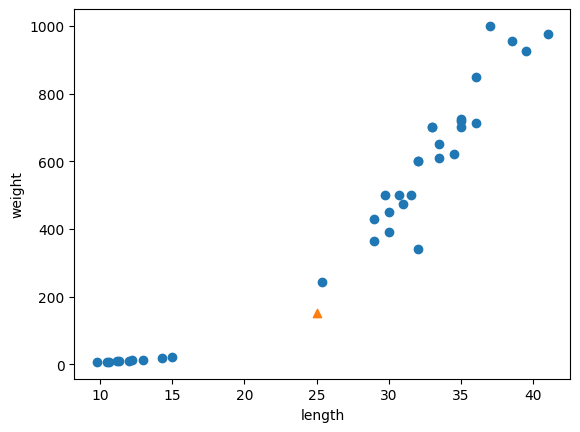

In [14]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

The orange dot is close to the bream data. In knn algorithm, when making predictions for a new data point, the algorithm looks at the k-nearest neighbors in the training dataset and assigns the class label that is most common among those neighbors. In other words, the algorithm **calculates the distance to all points** in the training dataset and **finds nearest neighbors**. To vote for the majority class, the algorithm assigns the class label that is most common among the k-nearest neighbors to the new data point.

In [15]:
distances, indexes = kn.kneighbors([[25,150]])
print(distances, indexes)
print(train_input[indexes])
print(train_target[indexes])

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


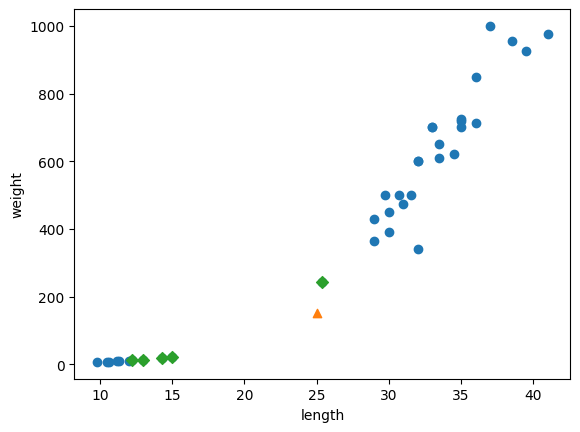

In [16]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

The five samples closest to the triangular sample are marked with green diamonds. Only one bream data is selected for the nearest neighbor, and the other four samples are all smelts.

The reason for this phenomenon is that the x-axis has a narrow range (10 to 40), while the y-axis has a wide range (0 to 1000). Even a small distance away from the y-axis results in a large calculated value. To illustrate this with more details, it is a way to adjust the x-axis range to be the same, ranging from 0 to 1000.

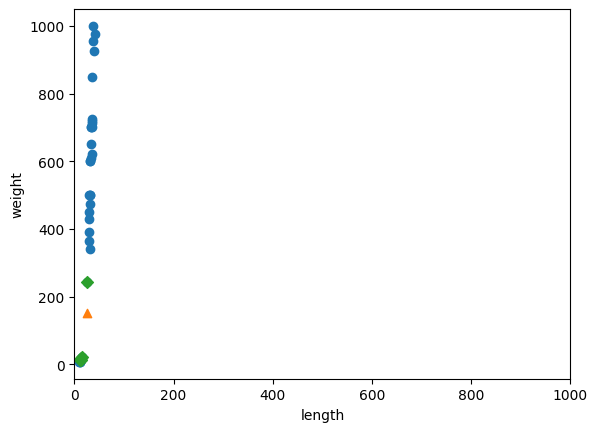

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

This graph shows that the scatter plot appears almost vertical and linear. The length of the fish (x-axis) has little influence on finding the nearest neighbors; only the weight of the fish (y-axis) is considered. The ranges of the two features (length and weight) are different, which is also referred to as differing *scales* between the two features.

If the criteria for representing the data are different, the algorithm cannot make accurate predictions, especially when the algorithm is distance-based. Such algorithms are heavily influenced by the distances between samples. To use them properly, it is necessary to standardize the feature values to a consistent criterion. This process is referred to as *data preprocessing*.

> Standardization, also known as z-score normalization, is one of the most widely used data preprocessing methods. The standard score is calculated by subtracting the mean and dividing by the standard deviation for each feature in the dataset. The formula for calculating the z-score *z* for a data point *x* in a feature is given by:


\begin{align}
z &= \frac{{x - \mu}}{{\sigma}}
\end{align}


> where:
- \( z \) is the standard score,
- \( x \) is the individual data point,
- \( \mu \) is the mean of the feature,
- \( \sigma \) is the standard deviation of the feature.


In [18]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [19]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [20]:
train_scaled = (train_input - mean) / std
print(train_input[:5])
print(train_scaled[:5])

[[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 11.3   8.7]
 [ 39.5 925. ]]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


We've created the *train_scaled* by transforming it into standard scores. Let's use these standard scores to the scatter plot.

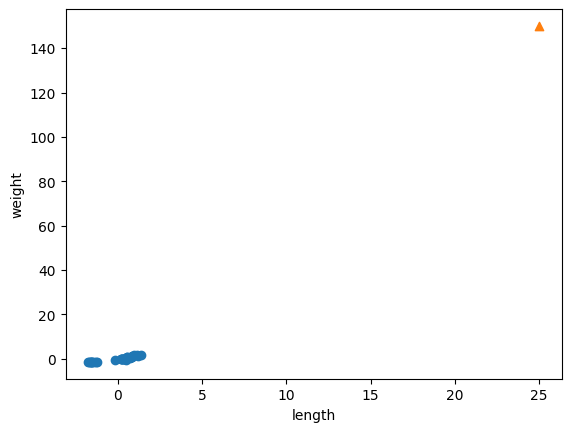

In [21]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

This is because the new data point (25, 150) is not transformed by using this *train_scaled*.

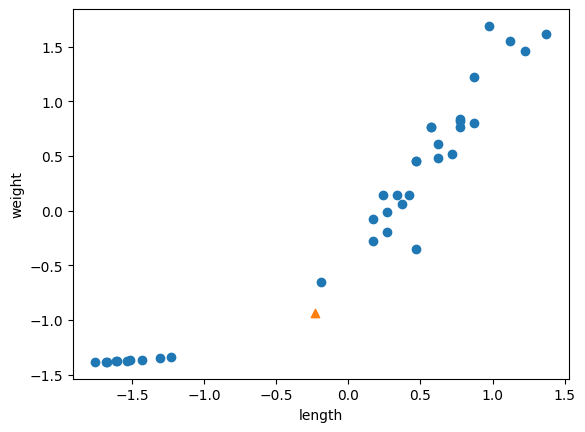

In [22]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

This graph above is nearly identical to the scatter plot before standard deviation transformation. The difference is that the ranges of the x-axis and y-axis have changed to be between -1.5 and 1.5. The two features of the training data now occupy a similar range.

In [23]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [24]:
test_scaled = (test_input - mean)/std
print(test_scaled)

[[-1.63258863 -1.37457062]
 [-1.55244793 -1.37395199]
 [ 0.24070039 -0.01267317]
 [-1.55244793 -1.37364268]
 [-0.07986244 -0.35291555]
 [-1.4923424  -1.3631261 ]
 [ 0.67145669  0.71420828]
 [ 0.67145669  0.3739659 ]
 [ 1.12224816  1.44108972]
 [ 0.77163257  0.69874271]
 [-0.09989762 -0.50757117]
 [ 0.37092904  0.14198246]
 [ 1.37268787  1.5338831 ]]


In [25]:
kn.score(test_scaled, test_target)

1.0

The mean and standard deviation used for scaling or normalizing the features in the test set should be the same as those computed from the training set.

In [26]:
print(kn.predict([new]))

[1.]


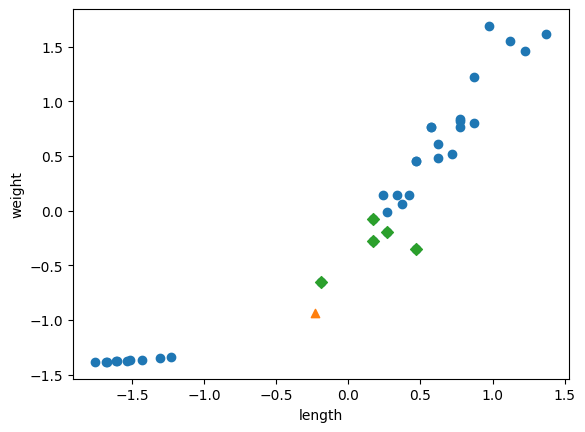

In [27]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

When the scales of two features are different, distance-based ML algorithms may not perform well. This is because these algorithms often rely on **measuring distances between data points**, and features with **larger scales can dominate **the calculation.

To address the issue of different feature scales, using the** standard score (z-score)** is a common practice. Standardizing the features helps bring them to a comparable scale, which is important for the proper functioning of distance-based algorithms.

It is important **to maintain consistency in data preprocessing between the training and test sets.** This includes using the same mean and standard deviation for scaling or normalizing features in both sets. This ensures that the model is exposed to consistent patterns during training and evaluation.